In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import axes3d, Axes3D
import sys
sys.path.append('../')
from Util import loadBeerRaw,loadWine


X_train, X_test, y_train, y_test= loadBeerRaw()
ica = FastICA(n_components=3,
         random_state=0)
encoder = LabelEncoder()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)
icaComponents =ica.fit_transform(X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']])
icaDf = pd.DataFrame(data = icaComponents
             , columns = ['ICA component 1', 'ICA component 2','ICA component 3'])

In [2]:
gmm = GaussianMixture(n_components=8)
gmm.fit(icaDf)
y_gmm = gmm.predict(icaDf)

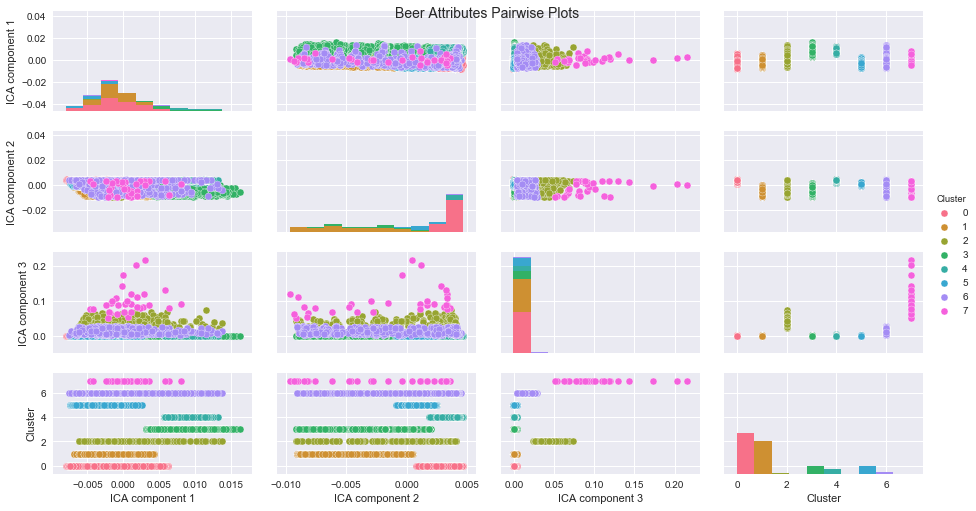

In [3]:
icaDf['Cluster'] =y_gmm
pp = sns.pairplot(icaDf, hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)

Text(0.5,0,'ICA component 3')

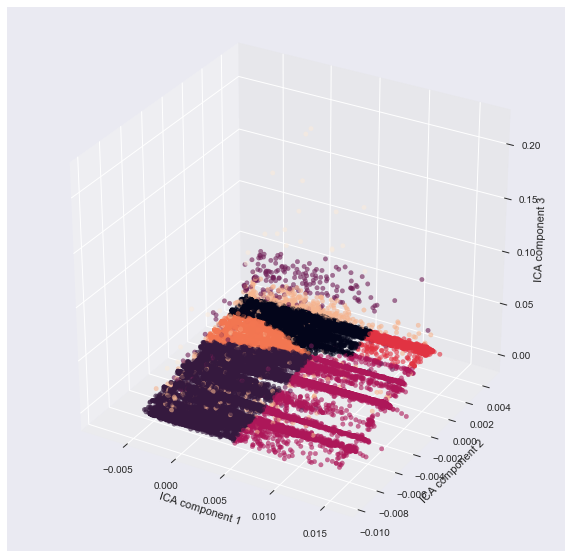

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
zs = icaDf[['ICA component 3']].values.flatten()
ys = icaDf[['ICA component 2']].values.flatten()
xs = icaDf[['ICA component 1']].values.flatten()
ax.scatter(xs, ys,zs,  alpha=0.6, c=y_gmm)
ax.set_xlabel('ICA component 1')
ax.set_ylabel('ICA component 2')
ax.set_zlabel('ICA component 3')